Estimated number of clusters: 4
Estimated number of noise points: 22


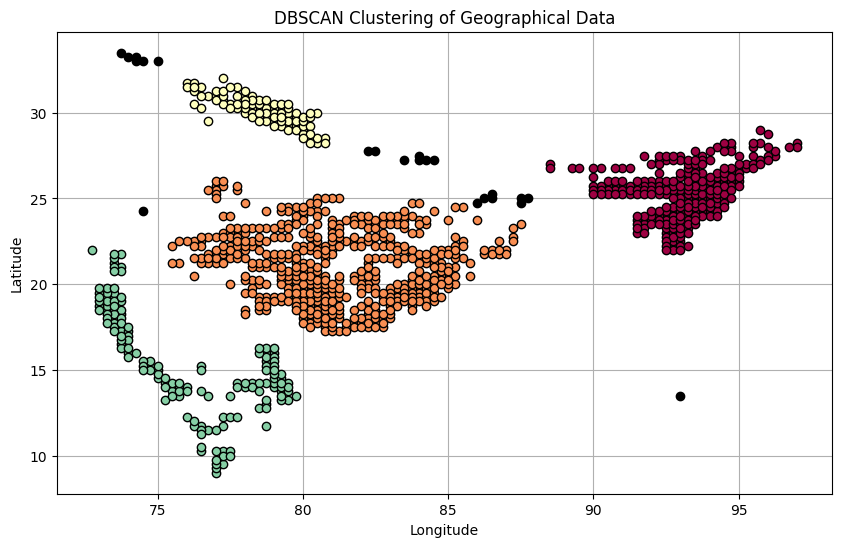

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('final_top_30_grids.csv')

# Assuming your CSV has columns named 'Lat' and 'Lon'
latitudes = df['Lat']
longitudes = df['Lon']
coordinates = df[['Lat', 'Lon']].to_numpy()

# Perform DBSCAN clustering
db = DBSCAN(eps=1.3, min_samples=10).fit(coordinates)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f'Estimated number of clusters: {n_clusters_}')
print(f'Estimated number of noise points: {n_noise_}')

# Create a new folder for the cluster files
output_folder = 'clusters_output'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Save Lat/Lon values for each cluster into separate files
unique_labels = set(labels)
for k in unique_labels:
    class_member_mask = (labels == k)
    cluster_data = df[class_member_mask]
    if k == -1:
        cluster_file = os.path.join(output_folder, 'noise_points.csv')
    else:
        cluster_file = os.path.join(output_folder, f'cluster_{k}.csv')
    cluster_data.to_csv(cluster_file, index=False)

# Plot the clusters
plt.figure(figsize=(10, 6))
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = coordinates[class_member_mask]
    plt.plot(xy[:, 1], xy[:, 0], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('DBSCAN Clustering of Geographical Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


# Making data files for clusters

In [ ]:
import pandas as pd
df1= pd.read_csv("final_top_30_grids_combined.csv",index_col=0)
df2= pd.read_csv("clusters_output/cluster_3.csv")  #### Chnage this to the desired cluster file

In [ ]:
df1=df1.drop(0)
df2=df2.drop(0)


# Initialize an empty dataframe to hold the combined data
combined_data = pd.DataFrame()

# Iterate through the dataframes and preprocess them before merging
for i in range(1, 3):  
    df_name = 'df' + str(i)
    if df_name in globals():  # Check if the dataframe exists
        df = globals()[df_name]
        print(f"Processing {df_name}")

        # Convert 'Lat' and 'Lon' columns to numeric values
        df['Lat'] = pd.to_numeric(df['Lat'], errors='coerce')
        df['Lon'] = pd.to_numeric(df['Lon'], errors='coerce')

        # Remove rows with non-numeric values in 'Lat' and 'Lon' columns
        df = df.dropna(subset=['Lat', 'Lon'])

        if not combined_data.empty:
            combined_data = pd.merge(combined_data, df, on=['Lat', 'Lon'], how='inner', sort=True)
        else:
            combined_data = df.copy()

# Reset index
combined_data.reset_index(drop=True, inplace=True)

# Save the combined data to a new CSV file
combined_data.to_csv('cluster_0_combined.csv', index=False)
